Вероятность успеха реализованным мной методом: 0.7272727272727273
Статистика для стандартной реализации:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.69      0.41      0.51        54

    accuracy                           0.73       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.73      0.71       154



Text(0, 0.5, 'Mean Error')

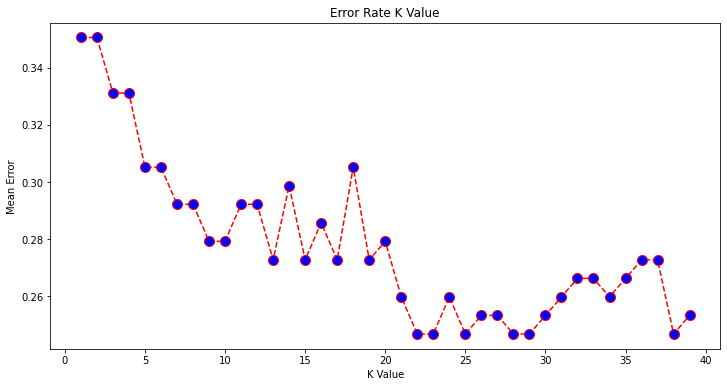

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def weighted_knn(data, p, k):
    distance = []
    for element in data:
        euclidean_distance = math.sqrt(
            (element[1][0] - p[0]) ** 2 + (element[1][1] - p[1]) ** 2 + (element[1][2] - p[2]) ** 2 + (element[1][3] - p[3]) ** 2 + (
                    element[1][4] - p[4]) ** 2 + (element[1][5] - p[5]) ** 2 + (element[1][6] - p[6]) ** 2 + (element[1][7] - p[7]) ** 2)
        distance.append((euclidean_distance, element[0]))
    distance = sorted(distance)[:k]
    freq1 = 0
    freq2 = 0
    for d in distance:
        if d[1] == 0:
            freq1 += (1 / d[0])

        elif d[1] == 1:
            freq2 += (1 / d[0])

    return 0 if freq1 > freq2 else 1


dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',
                        header=None)
dataframe.columns = ['Times pregnant', 'Glucose concentration', 'Blood pressure', 'Skinfold thickness', 'serum insulin',
                     'BMI', 'Pedigree', 'Age', 'Class']
X = dataframe.iloc[:, :-1].values
Y = dataframe.iloc[:, 8].values
k = 15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
df_listed_train = list(zip(Y_train, X_train))
df_listed_test = list(zip(Y_test, X_test))
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
My_success = 0

for element in df_listed_test:
    if element[0] == weighted_knn(df_listed_train, element[1], k):
        My_success += 1
print("Вероятность успеха реализованным мной методом:", My_success / len(df_listed_test))
print("Статистика для стандартной реализации:\n", classification_report(Y_test, Y_pred))

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
